# Чадори

Јас имам 4 чадори. Некои од нив се дома, некои на работа. Да го поедноставиме патувањето само на релација дома-работа и обратно. Чадор носам единствено кога врне. Ако не врне тогаш не носам чадор. Проблем настанува кога сите чадори се на едно место, јас сум на другото, а надвор врне. Тогаш одам без чадор и накиснувам. 

1.  Која е веројатноста дека ќе накиснам ако живеам и работам во Скопје?

## Решение

Да ја поставиме прво Марковата верига. Нека една состојба го означува бројот на чадори во просторијата во која сум јас. Значи имаме 5 состојби за 4 чадори. На пример, дома сум и имам до мене 3 чадори. Ако не врне, нема да понесам чадор и од состојба со 3 чадори ќе отидам на другото место каде веќе има 1 чадор, односно ќе отидам во состојбата со 1 чадор. Ако пак врне, ќе понесам чадор и од состојбата со 3 чадори ќе отидам на другото место каде веќе има 1 чадор, па таму ќе се зголеми бројот на 2 чадори. На овој начин се гради целата верига. Кога ќе се најдам во просторија без чадори, сите чадори се на другото место, тогаш ќе накиснам при преминување во состојбата со 4 чадори, колку што има на другото место, но само ако врне дожд.

Нека веројатноста за дожд е $q$.
*  $S_0$ - 0 чадори до мене
*  $S_1$ - 1 чадор до мене
*  $S_2$ - 2 чадори до мене
*  $S_3$ - 3 чадори до мене
*  $S_4$ - 4 чадори до мене



In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pydtmc as mc

In [2]:
states = np.array(['S_0', 'S_1', 'S_2', 'S_3', 'S_4'])
p_general = pd.DataFrame([[0, 0, 0, 0, 1], 
                          [0, 0, 0, '1-q', 'q'], 
                          [0, 0, '1-q', 'q', 0], 
                          [0, '1-q', 'q', 0, 0], 
                          ['1-q', 'q', 0, 0, 0]], columns=states, index=states)
p_general

S_0  S_1  S_2  S_3 S_4
S_0    0    0    0    0   1
S_1    0    0    0  1-q   q
S_2    0    0  1-q    q   0
S_3    0  1-q    q    0   0
S_4  1-q    q    0    0   0

### Одговор на задача 1

*  Која е веројатноста дека ќе накиснам ако живеам и работам во Скопје?

За да накиснеме потребно е да се најдеме во просторија без чадори, а дополнително и да врне дожд. Затоа ќе пресметаме стационарна распределба на веројатност за да ја видиме веројатноста дека ќе останеме без чадори, а дополнително таа веројатност ќе ја помножиме со веројатноста да врне дожд.

Статистиката вели дека Скопје има 87 врнежливи денови во годината. Следува дека $q = \frac{87}{365}$.

In [3]:
q = 87 / 365
p = p_general.replace('q', str(q)).replace('1-q', str(1-q)).astype('float')
p

S_0       S_1       S_2       S_3       S_4
S_0  0.000000  0.000000  0.000000  0.000000  1.000000
S_1  0.000000  0.000000  0.000000  0.761644  0.238356
S_2  0.000000  0.000000  0.761644  0.238356  0.000000
S_3  0.000000  0.761644  0.238356  0.000000  0.000000
S_4  0.761644  0.238356  0.000000  0.000000  0.000000


DISCRETE-TIME MARKOV CHAIN
 SIZE:         5
 CLASSES:      1
  - RECURRENT: 1
  - TRANSIENT: 0
 ABSORBING:    NO
 APERIODIC:    YES
 IRREDUCIBLE:  YES
 ERGODIC:      YES



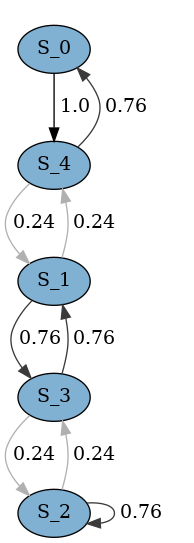

In [4]:
def draw_markov_chain(chain):
    plt.ioff()
    print(chain)
    fig, ax = mc.plot_graph(chain)
    ax.set_visible(False)
    plt.show()

chain = mc.MarkovChain(p, states)
draw_markov_chain(chain)

In [5]:
chain.pi

[array([0.15995397, 0.21001151, 0.21001151, 0.21001151, 0.21001151])]

Стационарната распределба вели дека 16% од времето ние ќе се наоѓаме во состојба без чадор. Оваа веројатност помножена со веројатноста за дожд `q` ни ја дава веројатноста да накиснеме. Испаѓа дека таа веројатност е околу 3.9%.

In [6]:
chain.pi[0][0] * q

0.03812601478632344

А еве и на друг начин, преку симулација, да покажеме дека е точна оваа вредност.

In [7]:
counter = 0
state = 'S_2'
days = 100000

for _ in range(days):
    state = np.random.choice(states, p=p.loc[state])
    today_is_rainy = np.random.choice([True, False], p=[q, 1-q])
    if state == 'S_0' and today_is_rainy:
        counter += 1

counter / days

0.03823